In [387]:
import numpy as np
import bs4
from requests import get
from bs4 import BeautifulSoup
import time
import requests
from lxml import html
import _pickle as cPickle
import re
from nltk.corpus import stopwords
import pandas as pd
import cufflinks as cf
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
cities=['Austin']
source=[]
num_pages=[]
base_url='https://www.monster.com/jobs/search/?q=Data-Scientist&where='

for ct in cities:
    source.append(get('https://www.monster.com/jobs/search/?q=Data-Scientist&where='+str(ct)).content)
for s in source:
    city=BeautifulSoup(s,'html.parser')
    job_count=city.find(class_='page-title visible-xs').contents[0].split()[0]
    if '+' or ',' in job_count:
        job_count=job_count.replace("+" or ',','')
    else:
        pass     
    #The website has 25 jobs per page.
    num_pages.append((int(np.ceil(int(job_count)/25.0))))

city_num_pages={ct:n_p for ct,n_p in zip(cities,num_pages)}

city_num_pages

{'Austin': 5}

In [161]:
base_url='https://www.monster.com/jobs/search/?q=data-scientist&where='
job_links_body=[]
for ct in cities:
    for n in range(1,city_num_pages[ct]+1):
        source= get(base_url +ct+'&page='+str(n)).content
        job_links_body.append(BeautifulSoup(source,'html.parser').find_all(name="div", attrs={"class":"jobTitle"}))
        

In [162]:
job_id=[]
for jlb in job_links_body:
    for div in jlb:
        job_id.append(div.find('a')['href'])

# with open('final_scrapped_links.pkl', 'wb') as f:
#     cPickle.dump(job_id, f)
    

In [71]:
page=get('https://job-openings.monster.com/Principal-Data-Scientist-Houston-TX-US-Conoco-Phillips/31/b6c7f12b-319a-44e2-a8ed-8f7a77627919').content
text = re.sub("[^a-zA-Z+3]"," ", str(page)) #get rid of things that aren't words; 3 for d3 and + for c++

text = text.lower().split()
stops = set(stopwords.words("english")) #filter out stop words in english language

text = [w for w in text if not w in stops]

text = list(set(text))

keywords = [str(word) for word in text if word in skill_set]
keywords

['tableau', 'python', 'hadoop']

In [140]:
page=get('https://job-openings.monster.com/Principal-Data-Scientist-Houston-TX-US-Conoco-Phillips/31/b6c7f12b-319a-44e2-a8ed-8f7a77627919').content
soup=BeautifulSoup(page,'html.parser')
for script in soup(['script','style']):
    script.extract()
text=soup.get_text()   
lines=(line.strip() for line in text.splitlines())
lines
chunks=[phrase.strip() for line in lines for phrase in line.split(" ")]
chunks=[c for c in chunks if not c=='']
a=str(chunks).lower().splitlines()
stops = set(stopwords.words("english"))
text = [w for w in text if not w in stops]
text=list(set(text))
keywords=[str(word) for word in text if word in skill_set]
keywords

['r']

In [241]:
skill_set = {'mapreduce': 0, 'spark': 0, 'python':0,'r':0, 'sql':0, 'hadoop':0, 'perl':0, 'matlab':0, 'hive':0, 'c++':0,'scala':0,
             'tableau':0, 'scala':0, 'nosql':0, 'sas':0, 'ruby':0, 'spss':0, 'mongodb':0,'java':0}

In [445]:
skill_set_dallas = {'mapreduce': 0, 'spark': 0, 'python':0,'r':0, 'sql':0, 'hadoop':0, 'perl':0, 'matlab':0, 'hive':0, 'c++':0,'scala':0,
             'tableau':0, 'scala':0, 'nosql':0, 'sas':0, 'ruby':0, 'spss':0, 'mongodb':0,'java':0}  

for j_i in job_id:
    page=get(j_i).content
    soup=BeautifulSoup(page,'html.parser')
    for script in soup(['script','style']):
        script.extract()
    text=soup.get_text()    
    html_text=re.sub("[^a-z.+3]"," ", str(text).lower())  
    for key in skill_set_dallas.keys():
        if key in html_text.split():  
            skill_set_dallas[key] +=1   


In [447]:
skill_set_dallas

{'c++': 10,
 'hadoop': 32,
 'hive': 8,
 'java': 28,
 'mapreduce': 4,
 'matlab': 2,
 'mongodb': 3,
 'nosql': 13,
 'perl': 1,
 'python': 48,
 'r': 42,
 'ruby': 2,
 'sas': 17,
 'scala': 29,
 'spark': 23,
 'spss': 6,
 'sql': 35,
 'tableau': 14}

In [ ]:
s=sum(skill_set_dallas.values())
for i in skill_set:
    skill_set_dallas[i]=round((skill_set_dallas[i]/s)*100,2)

In [178]:
import plotly 
plotly.tools.set_credentials_file(username='mustafa.shabbir10', api_key='HqXOEk594RfkDthtgoIQ')

In [211]:
master1=pd.DataFrame()
master1['skills']=skill_set_houston.keys()
master1['percentage']=skill_set_houston.values()
result1=master1.to_csv('houston.csv',index=False)

In [212]:
master2=pd.DataFrame()
master2['skills']=skill_set_austin.keys()
master2['percentage']=skill_set_austin.values()
result2=master2.to_csv('austin.csv',index=False)

In [213]:
master3=pd.DataFrame()
master3['skills']=skill_set_dallas.keys()
master3['percentage']=skill_set_dallas.values()
result3=master3.to_csv('austin.csv',index=False)

ValueError: could not convert string to float: 'spark'

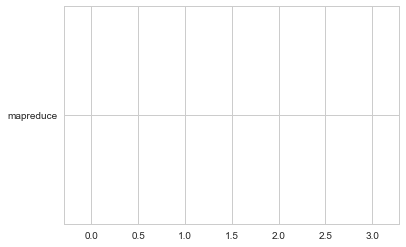

In [346]:
list1=[skill_set_houston]
list1.append(skill_set_austin)
list1.append(skill_set_dallas)
master=pd.DataFrame(list1,index=['Houston','Austin','Dallas']).T


Houston    2.54
Austin     3.04
Dallas     3.15
Name: c++, dtype: float64

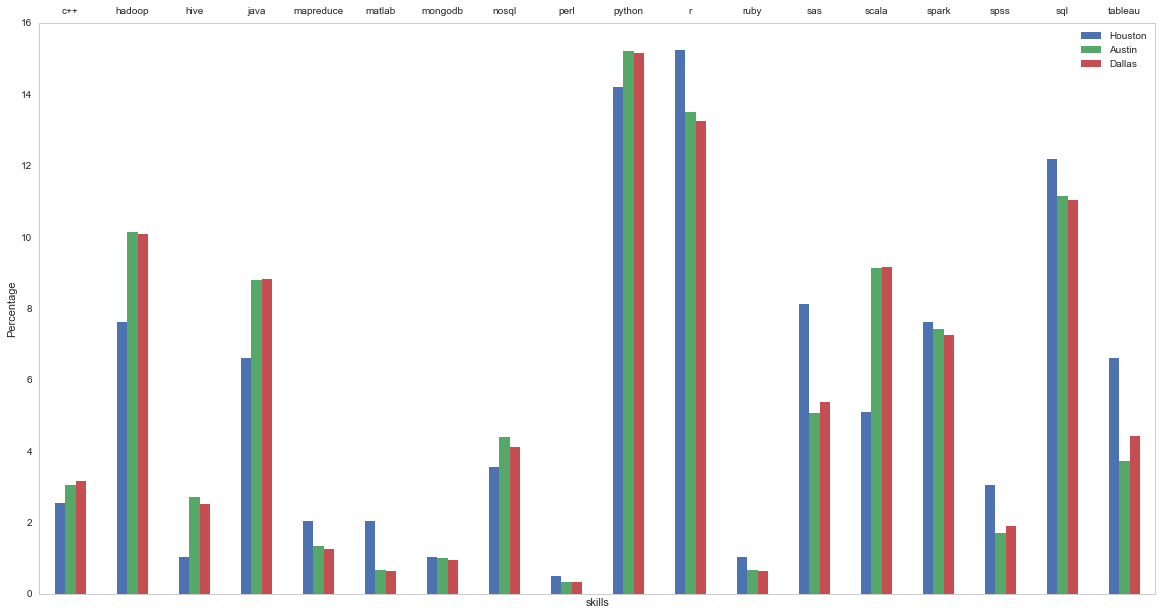

In [441]:
import numpy as np
import matplotlib.pyplot as plt

data1=[skill_set_houston]
data1.append(skill_set_austin)
data1.append(skill_set_dallas)

master.plot.bar()

plt.gca().xaxis.tick_top()
plt.xlabel('skills')
plt.ylabel('Percentage')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 10.5)
plt.grid(False)

In [448]:
from wordcloud import WordCloud

In [505]:
wordcloud1= WordCloud(background_color='white').fit_words(skill_set_austin)

In [506]:
label= ['Houston', 'Autin', 'Dallas']

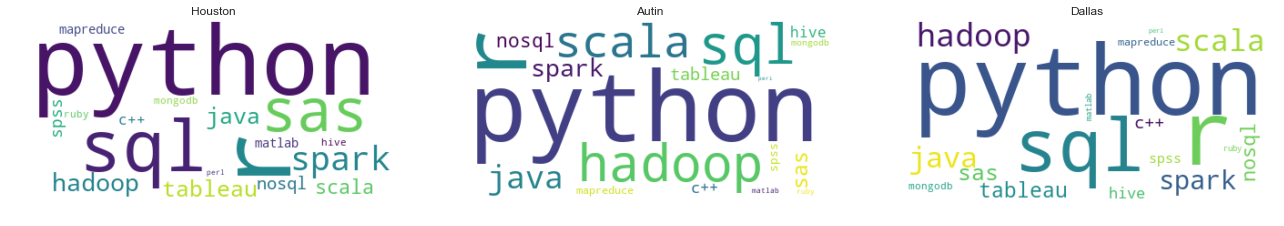

In [507]:
plt.figure(figsize=(30,30))
wordcloud=dict()
for i in range(3):
    wordcloud[i]= WordCloud(background_color='white').fit_words(data1[i])
    plt.subplot(6,4,i+1)
    plt.imshow(wordcloud[i], interpolation='bilinear')
    plt.axis("off")
    plt.title(label[i])
plt.show()